# Bayesian and other Distributions

Earlier, you observed the implementation of Bayesian models based on the Bernoulli distribution. However, it was mentioned that any model that makes decisions based on Bayes' rule is called a Bayesian model. In this section, we will examine a Bayesian model that uses Poisson and Exponential distributions.

Example: Suppose we want to predict the occurrence of a cyber attack on a site every hour, based on two features: the number of requests sent to the site and the number of purchases made from the site. It has been determined that the two predictor variables (number of requests and number of purchases), conditional on the response variable (occurrence of an attack), are independent and follow Poisson and Exponential distributions respectively. Let random variables $X_1$ and $X_0$ represent the number of requests in an hour when an attack occurs or doesn't occur, and random variables $Y_1$ and $Y_0$ represent the number of purchases in an hour when an attack occurs or doesn't occur. We have:

$$X_0 \sim Poi(100), X_1 \sim Poi(300)$$

$$Y_0 \sim Exp(0.1), Y_1 \sim Exp(0.25)$$

The probability of an attack is also assumed to be $0.1$.

To answer the given problem, we first need a function for each of the four random variables that takes a value and outputs the probability of observing that value so that we can use this probability in Bayes' formula. The functions `dpois` and `dexp`, which are default functions in the R language, can easily fulfill this requirement:


In [1]:
# `dpois(x, lambda)` returns probability of getting `x` as output of a poisson
# distribution with parameter `lambda`.
dpois(1, 3)
dpois(2, 3)

[1] 0.1493612

[1] 0.2240418

In [2]:
# `dexp(x, rate)` returns probability of getting `x` as output of a exponential
# distribution with parameter `rate`.
dexp(1, 3)
dexp(2, 3)

[1] 0.1493612

[1] 0.007436257

Now, for each possible outcome of the response variable (occurrence of an attack), we will define a function that takes the values of the predictor variables (number of requests and number of purchases) and returns the score of that outcome. By score, we mean the output of Bayes' formula without considering the denominator (the reason for ignoring the denominator was explained in the second section). If we denote this score by $B$:

$$B_{True}(x, y) = 0.1 P_{X_1}(x) P_{Y_1}(y)$$

$$B_{False}(x, y) = 0.9 P_{X_0}(x) P_{Y_0}(y)$$

Show that the above relationships are correct.

In [ ]:
Btrue <- function(x, y) {
  return (
    0.1 * dpois(x, 300) * dexp(y, 25)
  )
}

Bfalse <- function(x, y) {
  return (
    0.9 * dpois(x, 100) * dexp(y, 0.1)
  )
}

Btrue(100, 1)
Bfalse(100, 1)

[1] 9.870865e-52

[1] 0.003246095

Now, with a simple comparison of the output of the above functions, we can make a prediction for each input:

In [ ]:
predict_attack <- function(x, y) {
  return (Btrue(x, y) > Bfalse(x, y))
}

predict_attack(100, 1)
predict_attack(1000, 1)

[1] FALSE

[1] TRUE

In [ ]:
df = data.frame(row.names = seq(1, 100 * 30))
df['x'] = rep(seq(100), 30) * 10
df['y'] = rep(seq(30), each = 100)
df['prediction'] = apply(df, 1, function(row) {return (predict_attack(row['x'], row['y']))})
head(df)

,x,y,prediction
,<dbl>,<int>,<lgl>
1,10,1,FALSE
2,20,1,FALSE
3,30,1,FALSE
4,40,1,FALSE
5,50,1,FALSE
6,60,1,FALSE


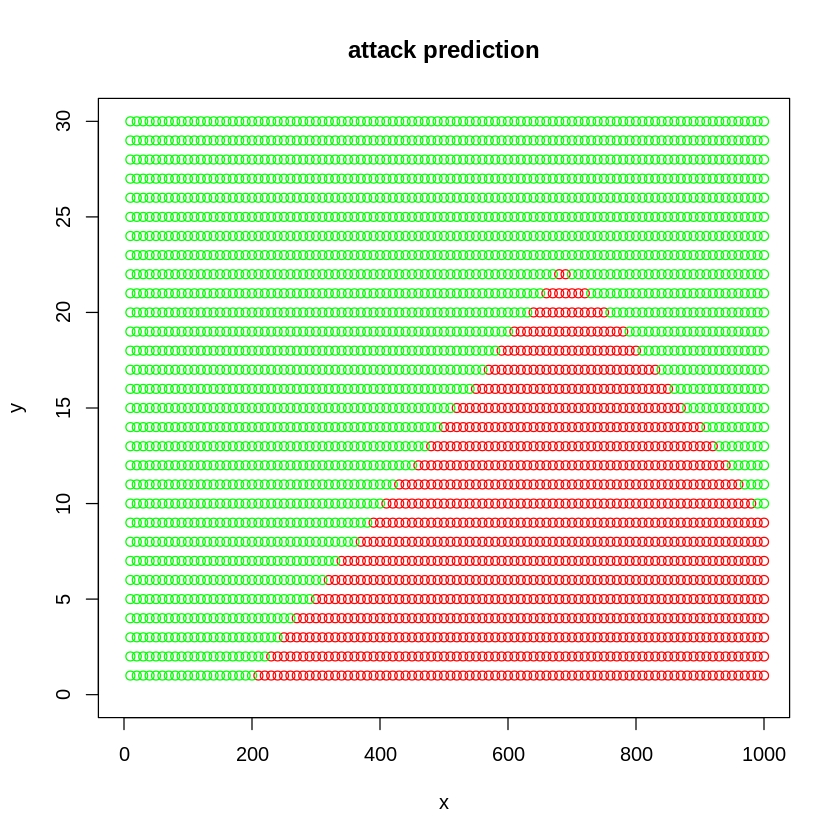

In [ ]:
plot(df[df$prediction, ]$x, df[df$prediction, ]$y, xlab = "x", ylab = "y", xlim = c(0, 1000), ylim = c(0, 30), main = "attack prediction", col = 'red')
points(df[!df$prediction, ]$x, df[!df$prediction, ]$y, col = 'green')